<a href="https://colab.research.google.com/github/BLayus/Buscador_Imoveis/blob/main/Buscador_Imoveis_Aluguel_ZAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install webdriver-manager
!pip install selenium
!apt-get update
!apt install chromium-chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,231 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [865 kB]
Get:10 http://archive.ubuntu.com/ubuntu

In [ ]:
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup
import urllib3.request
import requests

from tqdm.notebook import tqdm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Verificação do driver: se está funcionando retorna o html da página da folha de SP

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options= chrome_options)
driver.get('https://www.folha.uol.com.br/')

print(driver.page_source)

driver.close()

###Testando Site e Estratégias de Localização das Informações

In [ ]:
# Número página testando os elementos para usar no scrape
pagina = 1

# Teste driver
url = f'https://www.zapimoveis.com.br/aluguel/imoveis/rj+rio-de-janeiro+zona-sul+botafogo/?transacao=aluguel&onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Botafogo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EBotafogo,-22.951193,-43.180784,&pagina={pagina}&quartos=3,4'

# Faz requisição e resposta à página
driver = webdriver.Chrome(options= chrome_options)
driver.get(url)

# Printa o html da pagina toda
#print(driver.page_source)

# Acessa os anuncios atraves do nome da Classe html
resultados = driver.find_elements(By.CLASS_NAME, 'listing-wrapper__content')

# Imprime o tamanho da lista resultado
print(f'A lista possui: {len(resultados)} itens')

A lista possui: 1 itens


In [ ]:
teste = driver.find_elements(By.CLASS_NAME, 'result-card')

print(f'A lista possui: {len(teste)} itens')

A lista possui: 30 itens


In [ ]:
oferta = driver.find_elements(By.CLASS_NAME, 'l-card__content')
ofertas = [o.text for o in oferta]
print(ofertas)

['Botafogo, Rio de Janeiro\nRua Assis Bueno\nEXCLUSIVIDADE! VAZIO! Dois apartamentos de 3 quartos em Botafogo. Duas amplas varandas. Belíssimo apartamento na Rua Assis Bueno, constituído através da união de dois apartamentos, 3 quartos, suíte máster e possibilidade de reversão para quatro quartos, 5 banheiros, 4 vagas na escritura, rua tranquila, silenciosa e arborizada, apartamento bem ventilado com cômodos grandes, armários planejados, apartamento amplo e claro. Banheiro Empregados, Dependência Empregados, Armário Na Cozinha, Armário No Quarto, Área De Serviço, Armário no Banheiro, Piso Frio, Varanda. O prédio contém academia, Espaço Gourmet, Piscina com raia, Playground, Salão De Jogos, Sauna, Bicicletário, Brinquedoteca, Salão De Festas, Portaria 24 Horas. Contém duas vagas na escritura, Sol manhã. Entrar e morar! Documentação Cristalina. Perto da Rua da Passagem, Álvaro Ramos, Oliveira Fausto, Rodrigo de Brito, Visconde de Silva, Pinheiro Guimarães, Capitão Salomão, General Dionís

In [ ]:
# Tentativa via API

import requests
from requests.structures import CaseInsensitiveDict

url = "https://glue-api.zapimoveis.com.br/v2/listings?user=a871a7dc-e273-4a7e-b5db-46684a31b7d4&portal=ZAP&includeFields=search^%^28result^%^28listings^%^28listing^%^28listingsCount^%^2CsourceId^%^2CdisplayAddressType^%^2Camenities^%^2CusableAreas^%^2CconstructionStatus^%^2ClistingType^%^2Cdescription^%^2Ctitle^%^2Cstamps^%^2CcreatedAt^%^2Cfloors^%^2CunitTypes^%^2CnonActivationReason^%^2CproviderId^%^2CpropertyType^%^2CunitSubTypes^%^2CunitsOnTheFloor^%^2ClegacyId^%^2Cid^%^2Cportal^%^2CunitFloor^%^2CparkingSpaces^%^2CupdatedAt^%^2Caddress^%^2Csuites^%^2CpublicationType^%^2CexternalId^%^2Cbathrooms^%^2CusageTypes^%^2CtotalAreas^%^2CadvertiserId^%^2CadvertiserContact^%^2CwhatsappNumber^%^2Cbedrooms^%^2CacceptExchange^%^2CpricingInfos^%^2CshowPrice^%^2Cresale^%^2Cbuildings^%^2CcapacityLimit^%^2Cstatus^%^2CpriceSuggestion^%^29^%^2Caccount^%^28id^%^2Cname^%^2ClogoUrl^%^2ClicenseNumber^%^2CshowAddress^%^2ClegacyVivarealId^%^2ClegacyZapId^%^2CcreatedDate^%^2Cminisite^%^2Ctier^%^29^%^2Cmedias^%^2CaccountLink^%^2Clink^%^29^%^29^%^2CtotalCount^%^29^%^2Cpage^%^2Cfacets^%^2CfullUriFragments^%^2CsuperPremium^%^28search^%^28result^%^28listings^%^28listing^%^28listingsCount^%^2CsourceId^%^2CdisplayAddressType^%^2Camenities^%^2CusableAreas^%^2CconstructionStatus^%^2ClistingType^%^2Cdescription^%^2Ctitle^%^2Cstamps^%^2CcreatedAt^%^2Cfloors^%^2CunitTypes^%^2CnonActivationReason^%^2CproviderId^%^2CpropertyType^%^2CunitSubTypes^%^2CunitsOnTheFloor^%^2ClegacyId^%^2Cid^%^2Cportal^%^2CunitFloor^%^2CparkingSpaces^%^2CupdatedAt^%^2Caddress^%^2Csuites^%^2CpublicationType^%^2CexternalId^%^2Cbathrooms^%^2CusageTypes^%^2CtotalAreas^%^2CadvertiserId^%^2CadvertiserContact^%^2CwhatsappNumber^%^2Cbedrooms^%^2CacceptExchange^%^2CpricingInfos^%^2CshowPrice^%^2Cresale^%^2Cbuildings^%^2CcapacityLimit^%^2Cstatus^%^2CpriceSuggestion^%^29^%^2Caccount^%^28id^%^2Cname^%^2ClogoUrl^%^2ClicenseNumber^%^2CshowAddress^%^2ClegacyVivarealId^%^2ClegacyZapId^%^2CcreatedDate^%^2Cminisite^%^2Ctier^%^29^%^2Cmedias^%^2CaccountLink^%^2Clink^%^29^%^29^%^2CtotalCount^%^29^%^29&categoryPage=RESULT&developmentsSize=0&superPremiumSize=0&__zt=mtc^%^3Adeduplication&business=RENTAL&bedrooms=3^%^2C4&parentId=null&listingType=USED&addressCity=Rio+de+Janeiro&addressZone=Zona+Sul&addressLocationId=BR^%^3ERio+de+Janeiro^%^3ENULL^%^3ERio+de+Janeiro^%^3EZona+Sul^%^3EBotafogo&addressState=Rio+de+Janeiro&addressNeighborhood=Botafogo&addressPointLat=-22.951193&addressPointLon=-43.180784&addressType=neighborhood&page=2&size=15&from=112&levels=NEIGHBORHOOD&ref="

headers = CaseInsensitiveDict()
headers["Accept"] = "*/*"
headers["Accept-Language"] = "pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7,fr;q=0.6"
headers["Access-Control-Request-Headers"] = "authorization,x-deviceid,x-domain"
headers["x-domain"] = "https://www.zapimoveis.com.br"
headers["Access-Control-Request-Method"] = "GET"
headers["Connection"] = "keep-alive"
headers["Origin"] = "https://www.zapimoveis.com.br"
headers["Referer"] = "https://www.zapimoveis.com.br/"
headers["Sec-Fetch-Dest"] = "empty"
headers["Sec-Fetch-Mode"] = "same-origin"
headers["Sec-Fetch-Site"] = "same-site"
headers["User-Agent"] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36"


resp = requests.options(url, headers=headers)

print(resp.status_code)



204


In [ ]:
r = requests.request('GET', url, headers= headers)
print(r.json())

{'err': "{\n  code: 'UNEXPECTED-RESPONSE',\n  statusCode: 500,\n  details: {\n    err: null,\n    response: IncomingMessage {\n      _readableState: [ReadableState],\n      _events: [Object: null prototype],\n      _eventsCount: 3,\n      _maxListeners: undefined,\n      socket: [Socket],\n      httpVersionMajor: 1,\n      httpVersionMinor: 1,\n      httpVersion: '1.1',\n      complete: true,\n      rawHeaders: [Array],\n      rawTrailers: [],\n      aborted: false,\n      upgrade: false,\n      url: '',\n      method: null,\n      statusCode: 500,\n      statusMessage: '',\n      client: [Socket],\n      _consuming: true,\n      _dumped: false,\n      req: [ClientRequest],\n      request: [Request],\n      toJSON: [Function: responseToJSON],\n      caseless: [Caseless],\n      body: [Object],\n      [Symbol(kCapture)]: false,\n      [Symbol(kHeaders)]: [Object],\n      [Symbol(kHeadersCount)]: 14,\n      [Symbol(kTrailers)]: null,\n      [Symbol(kTrailersCount)]: 0,\n      [Symbol(Req

In [ ]:
for t in teste:
  print(t.text)


###Aplicando à Pagina

In [ ]:
# Construindo uma lista de infos que serão retiradas do site

list_endereco= list()
list_area= list()
list_quartos = list()
list_banheiros = list()
list_garagem = list()
list_preco = list()
list_condominio = list()
list_iptu = list()
list_amenidades = list()

In [ ]:
pbar = tqdm(range(1,4))
for pagina in pbar:

  url = f'  https://www.zapimoveis.com.br/aluguel/imoveis/rj+rio-de-janeiro+zona-sul+botafogo/?transacao=aluguel&onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Botafogo,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EBotafogo,-22.951193,-43.180784,&pagina={pagina}&quartos=3,4'

  #TQDM com a informação de progresso
  pbar.set_description("Processando página %s" % pagina)

  #Faz requisição e resposta à página
  driver = webdriver.Chrome(options= chrome_options)
  driver.get(url)

  #Acessa os anuncios atraves do nome da Classe html
  resultados = driver.find_elements(By.CSS_SELECTOR, 'div.l-card__content')

  pbar2 = tqdm(resultados)
  for r in pbar2:

    list_endereco.append(r.find_element(By.CLASS_NAME, 'card__address').text)
    list_area.append(r.find_element(By.CSS_SELECTOR, 'li.feature__item.text-small.js-areas').text)
    list_quartos.append(r.find_element(By.CSS_SELECTOR, 'li.feature__item.text-small.js-bedrooms').text)
    list_banheiros.append(r.find_element(By.CSS_SELECTOR, 'li.feature__item.text-small.js-bathrooms').text)
    list_garagem.append(r.find_elements(By.CSS_SELECTOR, 'li.feature__item.text-small.js-parking-spaces'))
    list_preco.append(r.find_elements(By.CSS_SELECTOR, 'p.simple-card__price.js-price.color-darker.heading-regular.heading-regular__bolder.align-left'))
    list_condominio.append(r.find_element(By.CSS_SELECTOR, 'span.card-price__value').text)
    list_iptu.append(r.find_elements(By.CLASS_NAME, 'card-price__item.iptu.text-regular'))


In [ ]:
#Fazendo pagina por pagina (Pag 1)

url = f'https://www.zapimoveis.com.br/aluguel/apartamentos/rj+rio-de-janeiro+zona-sul+jd-botanico/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Jardim%20Bot%C3%A2nico,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EJardim%20Botanico,-22.963785,-43.222283,%2Faluguel%2Fapartamentos%2Frj%2Brio-de-janeiro%2Bzona-sul%2Bjd-botanico%2F&pagina=1&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel'

#Faz requisição e resposta à página
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)

#Armazena e parseia em soup
response = driver.page_source
soup = BeautifulSoup(response, 'html.parser')

for r in driver.find_elements(By.CLASS_NAME, 'card-container'):
  print(r.text, '/n')


In [ ]:
list_preco = list()

for r in driver.find_elements(By.CSS_SELECTOR, 'p.simple-card__price.js-price.color-darker.heading-regular.heading-regular__bolder.align-left'):
  list_preco.append((r.text))

print(list_preco)

['R$ 5.400 /mês', 'R$ 4.850 /mês', 'R$ 4.000 /mês', 'R$ 3.000 /mês', 'R$ 2.500 /mês', 'R$ 3.200 /mês', 'R$ 4.800 /mês', 'R$ 4.100 /mês', 'R$ 13.600 /mês', 'R$ 2.500 /mês', 'R$ 3.900 /mês', 'R$ 2.450 /mês', 'R$ 4.000 /mês', 'R$ 4.000 /mês', 'R$ 13.600 /mês', 'R$ 4.300 /mês', 'R$ 3.000 /mês', 'R$ 4.000 /mês', 'R$ 2.600 /mês', 'R$ 5.200 /mês', 'R$ 2.400 /mês', 'R$ 4.500 /mês', 'R$ 6.500 /mês']


In [ ]:
list_condominio = list()

for r in driver.find_elements(By.CSS_SELECTOR, 'span.card-price__value'):
  list_condominio.append(r.text)

print(list_condominio)

['R$ 1.600', 'R$ 560', 'R$ 1.491', 'R$ 343', 'R$ 842', 'R$ 480', 'R$ 1.038', 'R$ 953', 'R$ 265', 'R$ 1.047', 'R$ 287', 'R$ 1.250', 'R$ 484', 'R$ 1.085', 'R$ 354', 'R$ 1.063', 'R$ 322', 'R$ 507', 'R$ 186', 'R$ 1.424', 'R$ 311', 'R$ 600', 'R$ 113', 'R$ 651', 'R$ 391', 'R$ 842', 'R$ 480', 'R$ 1.063', 'R$ 322', 'R$ 832', 'R$ 479', 'R$ 459', 'R$ 197', 'R$ 1.188', 'R$ 350', 'R$ 1.021', 'R$ 274', 'R$ 550', 'R$ 350', 'R$ 958', 'R$ 210', 'R$ 1.306', 'R$ 293', 'R$ 1.170', 'R$ 322', 'R$ 2.000', 'R$ 334']


In [ ]:
list_iptu = list()

for r in driver.find_elements(By.CLASS_NAME, 'card-price__item.iptu.text-regular'):
  list_iptu.append((r.text))

print(list_iptu)

['IPTU R$ 560', 'IPTU R$ 343', 'IPTU R$ 480', 'IPTU R$ 265', 'IPTU R$ 287', 'IPTU R$ 484', 'IPTU R$ 354', 'IPTU R$ 322', 'IPTU R$ 186', 'IPTU R$ 311', 'IPTU R$ 113', 'IPTU R$ 391', 'IPTU R$ 480', 'IPTU R$ 322', 'IPTU R$ 479', 'IPTU R$ 197', 'IPTU R$ 350', 'IPTU R$ 274', 'IPTU R$ 350', 'IPTU R$ 210', 'IPTU R$ 293', 'IPTU R$ 322', 'IPTU R$ 334']


In [ ]:
for r in driver.find_elements(By.CLASS_NAME, 'simple-card__address'):
  list_endereco.append((r.text))

print(list_endereco)

['Rua Pio Correia, Jardim Botânico', 'Rua Pio Correia, Jardim Botânico', 'Rua Lópes Quintas, Jardim Botânico', 'Rua J. Carlos, Jardim Botânico', 'Rua Von Martius, Jardim Botânico', 'Rua Pio Correia, Jardim Botânico', 'Rua Visconde da Graça, Jardim Botânico', 'Rua Visconde da Graça, Jardim Botânico', 'Jardim Botânico, Rio de Janeiro', 'Rua Maria Angélica, Jardim Botânico', 'Avenida Lineu de Paula Machado, Jardim Botânico', 'Praça Pio XI, Jardim Botânico', 'Rua Jardim Botânico, Jardim Botânico', 'Rua Lópes Quintas, Jardim Botânico', 'Jardim Botânico, Rio de Janeiro', 'Rua Lópes Quintas, Jardim Botânico', 'Rua Senador Simonsen, Jardim Botânico', 'Rua Faro, Jardim Botânico', 'Rua Jardim Botânico, Jardim Botânico', 'Rua Ingles de Sousa, Jardim Botânico', 'Rua Jardim Botânico, Jardim Botânico', 'Rua Faro, Jardim Botânico', 'Rua Jardim Botânico, Jardim Botânico', 'Rua Jardim Botânico, Jardim Botânico']


In [ ]:
list_quartos = list()

for r in driver.find_elements(By.CSS_SELECTOR, 'li.feature__item.text-small.js-bedrooms'):
  list_quartos.append(r.text)

print(list_quartos)

['bedroom 3', 'bedroom 3', 'bedroom 2', 'bedroom 2', 'bedroom 3', 'bedroom 2', 'bedroom 3', 'bedroom 2', 'bedroom 2', 'bedroom 1', 'bedroom 3', 'bedroom 1', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 3', 'bedroom 2', 'bedroom 2', 'bedroom 2', 'bedroom 2']


In [ ]:
list_banheiros = list()

for r in driver.find_elements(By.CSS_SELECTOR, 'li.feature__item.text-small.js-bathrooms'):
  list_banheiros.append(r.text)

print(list_banheiros)

['', '', '', '', 'bathroom 2', '', '', '', '', 'bathroom 1', '', 'bathroom 1', '', '', '', '', '', '', 'bathroom 2', '', '', '', '', '']


In [ ]:
list_area= list()

for r in driver.find_elements(By.CSS_SELECTOR, 'li.feature__item.text-small.js-areas'):
  list_area.append(r.text)

print(list_area)


['area 136 m²', 'area 111 m²', 'area 90 m²', 'area 75 m²', 'area 78 m²', 'area 78 m²', 'area 93 m²', 'area 80 m²', 'area 78 m²', 'area 50 m²', 'area 100 m²', 'area 40 m²', 'area 117 m²', 'area 90 m²', 'area 78 m²', 'area 85 m²', 'area 63 m²', 'area 75 m²', 'area 85 m²', 'area 96 m²', 'area 67 m²', 'area 72 m²', 'area 90 m²', 'area 100 m²']


In [ ]:
list_garagem = list()

for r in driver.find_elements(By.CSS_SELECTOR, 'li.feature__item.text-small.js-parking-spaces'):
  list_garagem.append(r.text)

print(list_garagem)

['', '', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', '', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', 'parking 1', '']


In [ ]:
#Fazendo pagina por pagina (Pag 2)

url = f'https://www.zapimoveis.com.br/aluguel/apartamentos/rj+rio-de-janeiro+zona-sul+jd-botanico/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Jardim%20Bot%C3%A2nico,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EJardim%20Botanico,-22.963785,-43.222283,%2Faluguel%2Fapartamentos%2Frj%2Brio-de-janeiro%2Bzona-sul%2Bjd-botanico%2F&pagina=2&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel'

#Faz requisição e resposta à página
driver = webdriver.Chrome(chrome_options=chrome_options)
driver.get(url)

#Armazena e parseia em soup
response = driver.page_source
soup = BeautifulSoup(response, 'html.parser')

len(driver.find_elements(By.CLASS_NAME, 'card-container'))

for r in driver.find_elements(By.CLASS_NAME, 'card-container'):
  print(r.text, '/n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


arrow_big_shadow_right
super destaque
heart
R$ 4.800 /mês
condomínioR$ 952 IPTU R$ 380
Rua Benjamim Batista, Jardim Botânico
area 109 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
super destaque
heart
R$ 13.000 /mês
verified
Preço abaixo do mercado
condomínioR$ 2.300 IPTU R$ 1.719
Rua Benjamim Batista, Jardim Botânico
area 325 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
super destaque
heart
R$ 5.400 /mês
condomínioR$ 1.600 IPTU R$ 560
Rua Pio Correia, Jardim Botânico
area 136 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 2.680 /mês
condomínioR$ 941 IPTU R$ 142
Jardim Botânico, Rio de Janeiro
area 48 m²
bedroom 1
parking 1
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 10.850 /mês
condomínioR$ 1.847 IPTU R$ 291
Jardim Botânico, Rio de Janeiro
area 85 m²
bedroom 2
parking 1
Ligar
Mensagem /n
arrow_big_shadow_right
super destaque
heart
R$ 5.400 /mês
condomínioR$ 1.600 IPTU R$ 560
Rua Pio Correia, Jardim Botânico
area 136 m²
bedroom 3
Ligar
Mensagem /n

In [ ]:
#Fazendo pagina por pagina (Pag 3)

url = f'https://www.zapimoveis.com.br/aluguel/apartamentos/rj+rio-de-janeiro+zona-sul+jd-botanico/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Jardim%20Bot%C3%A2nico,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EJardim%20Botanico,-22.963785,-43.222283,%2Faluguel%2Fapartamentos%2Frj%2Brio-de-janeiro%2Bzona-sul%2Bjd-botanico%2F&pagina=3&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel'

#Faz requisição e resposta à página
driver = webdriver.Chrome(chrome_options=chrome_options)
driver.get(url)

#Armazena e parseia em soup
response = driver.page_source
soup = BeautifulSoup(response, 'html.parser')

len(driver.find_elements(By.CLASS_NAME, 'card-container'))

for r in driver.find_elements(By.CLASS_NAME, 'card-container'):
  print(r.text, '/n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


arrow_big_shadow_right
heart
R$ 4.300 /mês
condomínioR$ 1.200 IPTU R$ 250
Avenida Lineu de Paula Machado, Jardim Botânico
area 91 m²
bedroom 3
parking 1
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 3.100 /mês
condomínioR$ 1.330 IPTU R$ 240
Rua Faro, Jardim Botânico
area 70 m²
bedroom 1
bathroom 1
Ligar
Mensagem /n
arrow_big_shadow_right
destaque
heart
R$ 5.400 /mês
condomínioR$ 1.600 IPTU R$ 602
Rua Pio Correia, Jardim Botânico
area 137 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
destaque
heart
R$ 4.800 /mês
condomínioR$ 600 IPTU R$ 577
Rua Ingles de Sousa, Jardim Botânico
area 138 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 5.500 /mês
condomínioR$ 1.360 IPTU R$ 481
Jardim Botânico, Rio de Janeiro
area 125 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 4.900 /mês
condomínioR$ 1.400 IPTU R$ 418
Rua Pio Correia, Jardim Botânico
area 125 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 4.900 /mês
condomínioR$ 1.220 IPTU R$ 22

In [ ]:
#Fazendo pagina por pagina (Pag 4)

url = f'https://www.zapimoveis.com.br/aluguel/apartamentos/rj+rio-de-janeiro+zona-sul+jd-botanico/?onde=,Rio%20de%20Janeiro,Rio%20de%20Janeiro,Zona%20Sul,Jardim%20Bot%C3%A2nico,,,neighborhood,BR%3ERio%20de%20Janeiro%3ENULL%3ERio%20de%20Janeiro%3EZona%20Sul%3EJardim%20Botanico,-22.963785,-43.222283,%2Faluguel%2Fapartamentos%2Frj%2Brio-de-janeiro%2Bzona-sul%2Bjd-botanico%2F&pagina=4&tipo=Im%C3%B3vel%20usado&tipoUnidade=Residencial,Apartamento&transacao=Aluguel'

#Faz requisição e resposta à página
driver = webdriver.Chrome(chrome_options=chrome_options)
driver.get(url)

#Armazena e parseia em soup
response = driver.page_source
soup = BeautifulSoup(response, 'html.parser')

len(driver.find_elements(By.CLASS_NAME, 'card-container'))

for r in driver.find_elements(By.CLASS_NAME, 'card-container'):
  print(r.text, '/n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: use options instead of chrome_options
  


arrow_big_shadow_right
heart
R$ 4.900 /mês
condomínioR$ 1.400 IPTU R$ 418
Rua Pio Correia, Jardim Botânico
area 125 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 1.800 /mês
condomínioR$ 500 IPTU R$ 125
Jardim Botânico, Rio de Janeiro
area 32 m²
bedroom 1
bathroom 1
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 6.500 /mês
condomínioR$ 1.776 IPTU R$ 490
Jardim Botânico, Rio de Janeiro
area 157 m²
bedroom 4
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 4.100 /mês
condomínioR$ 1.293 IPTU R$ 262
Rua Jardim Botânico, Jardim Botânico
area 73 m²
bedroom 3
parking 1
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 18.887 /mês
condomínioR$ 1.848 IPTU R$ 292
Rua Jardim Botânico, Jardim Botânico
area 80 m²
bedroom 2
parking 1
Ligar
Mensagem /n
arrow_big_shadow_right
destaque
heart
R$ 13.000 /mês
condomínioR$ 2.300 IPTU R$ 1.700
Rua Benjamim Batista, Jardim Botânico
area 325 m²
bedroom 3
Ligar
Mensagem /n
arrow_big_shadow_right
heart
R$ 4.500 /mês
condomínioR$ 1.446 IPTU R

### Tratamento das listas

In [ ]:
list_titulo = [l.replace ('  ', '') for l in list_titulo]

In [ ]:
list_titulo

['Apartamento com 3 Quartos para Aluguel, 100m²',
 'Apartamento com 2 Quartos para Aluguel, 75m²',
 'Apartamento com 3 Quartos para Aluguel, 93m²',
 'Apartamento com 2 Quartos para Aluguel, 79m²',
 'Apartamento com 3 Quartos para Aluguel, 78m²',
 'Apartamento com 3 Quartos para Aluguel, 100m²',
 'Apartamento com 3 Quartos para Aluguel, 78m²',
 'Apartamento com 3 Quartos para Aluguel, 73m²',
 'Apartamento com 3 Quartos para Aluguel, 91m²',
 'Apartamento com 3 Quartos para Aluguel, 98m²',
 'Apartamento com 2 Quartos para Venda/Aluguel 58m²',
 'Apartamento com 3 Quartos à Venda/Aluguel 109m²',
 'Apartamento com 4 Quartos para Aluguel, 280m²',
 'Apartamento com 2 Quartos para Aluguel, 90m²',
 'Apartamento com 3 Quartos para Aluguel, 325m²',
 'Apartamento com 3 Quartos para Aluguel, 118m²',
 'Apartamento com 2 Quartos para Venda/Aluguel 63m²',
 'Apartamento comQuarto para Aluguel, 64m²',
 'Apartamento comQuarto para Aluguel, 48m²',
 'Apartamento com 3 Quartos para Venda/Aluguel 111m²',
 'Ap

In [ ]:
list_endereco = [l.split('-')[0] for l in list_endereco]

In [ ]:
list_endereco

[' Avenida Lineu de Paula Machado, 826 ',
 ' Rua Faro, 51 ',
 ' Rua Peri ',
 ' Rua Pio Correia, 92 ',
 ' Rua Von Martius ',
 ' Rua Abade Ramos ',
 ' Rua Pio Correia ',
 ' Rua Jardim Botânico ',
 ' Avenida Lineu de Paula Machado ',
 ' Rua Conde Afonso Celso, 89 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Benjamim Batista ',
 ' Rua Nascimento Bittencourt ',
 ' Rua Jardim Botânico, 227 ',
 ' Rua Benjamim Batista ',
 ' Rua Jardim Botânico ',
 ' Rua Jardim Botânico ',
 ' Rua Jardim Botânico, 667 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Benjamim Batista ',
 ' Rua Benjamim Batista ',
 ' Avenida Lineu de Paula Machado ',
 ' Rua Ingles de Sousa, 193 ',
 ' Rua Senador Simonsen, 12 ',
 ' Rua Corcovado ',
 ' Rua Lópes Quintas, 74 ',
 ' Rua Jardim Botânico ',
 ' Rua Visconde da Graça, 96 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Faro ',
 ' Avenida Lineu de Paula Machado, 1000 ',
 ' Jardim Botânico, Rio de Janeiro ',
 ' Rua Lópes Quintas ',
 ' Rua Jardim Botânico, 728 ',
 ' Rua Visc

In [ ]:
list_area = [l.replace (' ', '') for l in list_area]

In [ ]:
list_area = [float(l) for l in list_area]

In [ ]:
list_quartos = [l.replace ('  ', '') for l in list_quartos]

In [ ]:
list_quartos = [int(l.split("Q")[0]) for l in list_quartos]

In [ ]:
list_quartos

[3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 2,
 4,
 2,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 3,
 3]

In [ ]:
list_banheiros = [l.replace ('  ', '') for l in list_banheiros]

In [ ]:
list_banheiros = [int(l.split(" ")[0]) for l in list_banheiros]

In [ ]:
list_banheiros

[2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 3,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 2,
 4,
 2,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 5,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 2,
 1,
 2,
 3]

In [ ]:
list_garagem = [l.replace ('  ', '') for l in list_garagem]

In [ ]:
list_garagem = [int(l.split(' ')[0]) if l != '-- Vaga' else 0 for l in list_garagem]

In [ ]:
list_garagem

[1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 1,
 1]

In [ ]:
list_preco = [l.replace ('  ', '') for l in list_preco]

In [ ]:
list_preco = [float(l.split(' ')[1].replace('.',''))for l in list_preco]

In [ ]:
list_preco

[3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 5500.0,
 3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 5400.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 3900.0,
 4000.0,
 4500.0,
 2800.0,
 2500.0,
 4500.0,
 5500.0,
 4100.0,
 4300.0,
 4200.0,
 3500.0,
 4800.0,
 19500.0,
 2500.0,
 13000.0,
 3600.0,
 3000.0,
 4500.0,
 2680.0,
 5000.0,
 13000.0,
 3900.0,
 4800.0,
 3000.0,
 13000.0,
 4300.0,
 4200.0,
 5300.0,
 4200.0,
 3100.0,
 7500.0,
 3800.0,
 4500.0,
 4000.0,
 4800.0,
 5500.0]

In [ ]:
list_condominio = [l.replace (' Condomínio:   ', '') for l in list_condominio]

In [ ]:
list_condominio =  [l.replace ('   ', '') for l in list_condominio]

In [ ]:
list_condominio = [float(l.split(' ')[1].replace('.', '')) for l in list_condominio]

In [ ]:
list_condominio

[1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1500.0,
 1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 1600.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1424.0,
 1188.0,
 1216.0,
 1536.0,
 953.0,
 1150.0,
 730.0,
 1293.0,
 1200.0,
 1160.0,
 506.0,
 952.0,
 2536.0,
 1170.0,
 2300.0,
 1005.0,
 1100.0,
 837.0,
 941.0,
 1732.0,
 2300.0,
 1424.0,
 600.0,
 459.0,
 4459.0,
 832.0,
 1100.0,
 1400.0,
 300.0,
 1330.0,
 1827.0,
 1097.0,
 1446.0,
 651.0,
 1250.0,
 1500.0]

### Construindo dataset

In [ ]:
df = pd.DataFrame({'Titulo': list_titulo,
                        'Endereco': list_endereco,
                        'Area': list_area,
                        'Quartos': list_quartos,
                        'Banheiros': list_banheiros,
                        'Vagas': list_garagem,
                        'Preco': list_preco,
                        'Condomínio': list_condominio})

In [ ]:
df['Valor Total'] = df['Preco'] + df['Condomínio']

In [ ]:
df['Valor M2'] = df['Valor Total'] / df['Area']

In [ ]:
df.head()

,Titulo,Endereco,Area,Quartos,Banheiros,Vagas,Preco,Condomínio,Valor Total,Valor M2
0,"Apartamento com 3 Quartos para Aluguel, 100m²","Avenida Lineu de Paula Machado, 826",100.0,3,2,1,3900.0,1424.0,5324.0,53.240000
1,"Apartamento com 2 Quartos para Aluguel, 75m²","Rua Faro, 51",75.0,2,3,1,4000.0,1188.0,5188.0,69.173333
2,"Apartamento com 3 Quartos para Aluguel, 93m²",Rua Peri,93.0,3,2,1,4500.0,1216.0,5716.0,61.462366
3,"Apartamento com 2 Quartos para Aluguel, 79m²","Rua Pio Correia, 92",79.0,2,2,1,2800.0,1536.0,4336.0,54.886076
4,"Apartamento com 3 Quartos para Aluguel, 78m²",Rua Von Martius,78.0,3,2,0,2500.0,953.0,3453.0,44.269231


### Analisando os Resultados

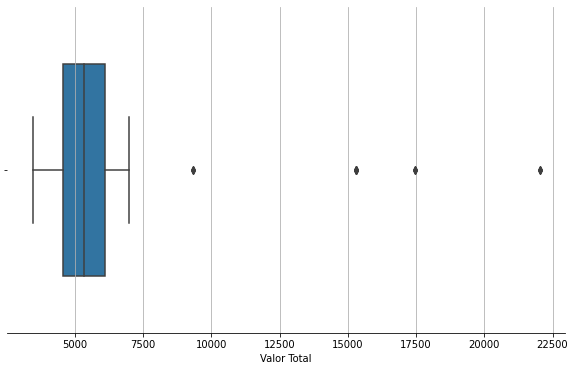

In [ ]:
# Distribuição por boxplot do valor TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

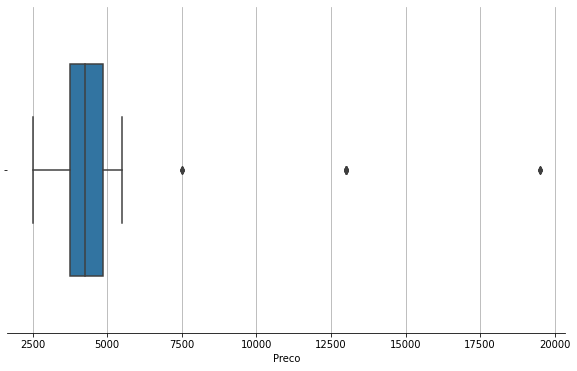

In [ ]:
# Distribuição por boxplot do valor do ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Preco', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

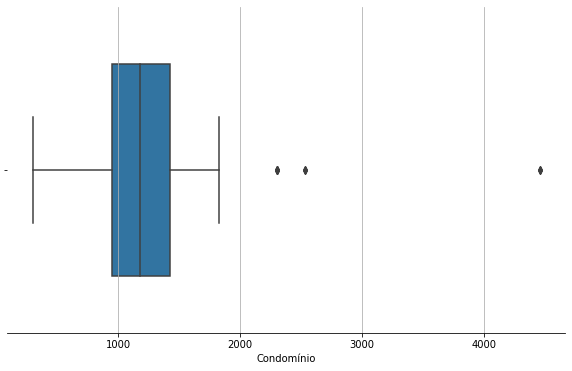

In [ ]:
# Distribuição por boxplot do valor do CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Condomínio', data= df, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

###Comparativo

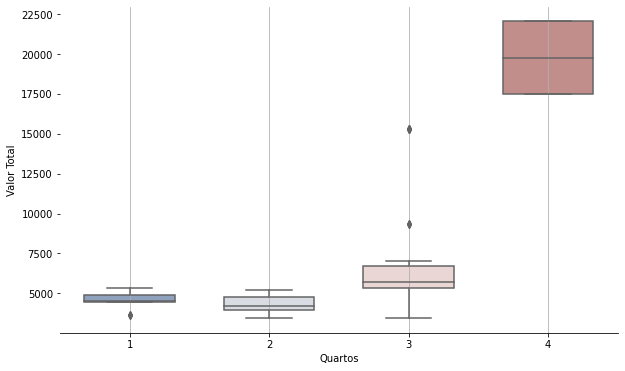

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Valor Total', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)


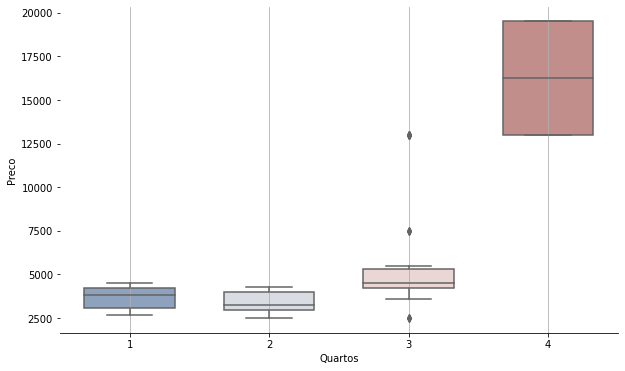

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Preco', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

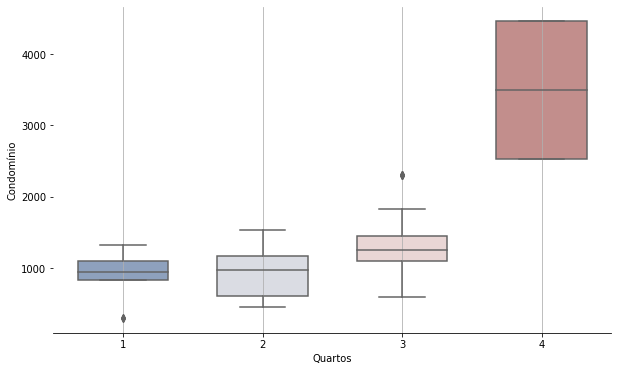

In [ ]:
# Plotando boxplots para avaliar distribuição por quartos CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Quartos', y= 'Condomínio', data= df, width= .65, palette='vlag')
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

### Apartamentos com 2 dormitórios

In [ ]:
y = [df[df['Quartos'] == 2]]
df2 = pd.DataFrame(y[0])

df2

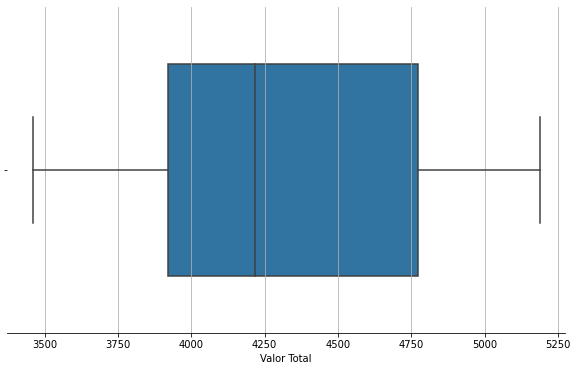

In [ ]:
#Segmentado por quantidade de quartos 2 TOTAL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de valores para 2 quartos é: {df2['Valor Total'].mean()}")
print(f" A mediana de valores para 2 quartos é: {df2['Valor Total'].median()}")
print(f" O Valor máximo é: {df2['Valor Total'].max()}")
print(f" O Valor mínimo é: {df2['Valor Total'].min()}\n")

print(f" O total de imóveis com 2 quartos é: {len(df2['Valor Total'])}")

 A média de valores para 2 quartos é: 4317.75
 A mediana de valores para 2 quartos é: 4218.0
 O Valor máximo é: 5188.0
 O Valor mínimo é: 3459.0

 O total de imóveis com 2 quartos é: 24


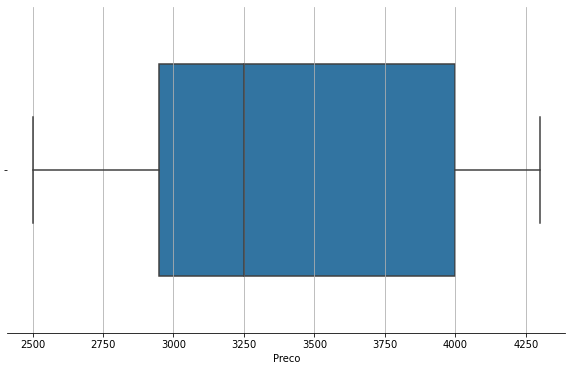

In [ ]:
#Segmentado por quantidade de quartos 2 ALUGUEL

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Preco', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

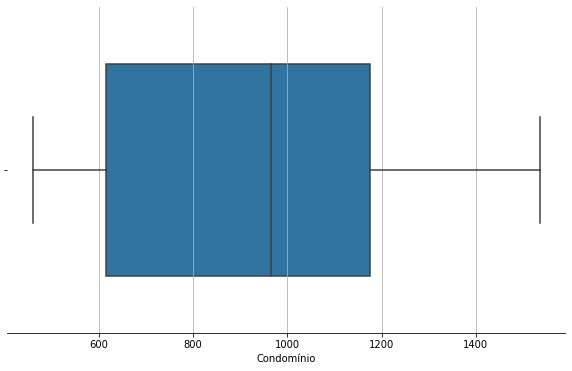

In [ ]:
#Segmentado por quantidade de quartos 2 CONDO

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Condomínio', data= df2, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de Aluguel para 2 quartos é: {df2['Preco'].mean()}")
print(f" A mediana de Aluguel para 2 quartos é: {df2['Preco'].median()}")
print(f" O Valor máximo é: {df2['Preco'].max()}")
print(f" O Valor mínimo é: {df2['Preco'].min()}\n")

print(f" A média de Condomínio para 2 quartos é: {df2['Condomínio'].mean()}")
print(f" A mediana de Condomínio para 2 quartos é: {df2['Condomínio'].median()}")
print(f" O Valor máximo é: {df2['Condomínio'].max()}")
print(f" O Valor mínimo é: {df2['Condomínio'].min()}\n")

 A média de Aluguel para 2 quartos é: 3387.5
 A mediana de Aluguel para 2 quartos é: 3250.0
 O Valor máximo é: 4300.0
 O Valor mínimo é: 2500.0

 A média de Condomínio para 2 quartos é: 930.25
 A mediana de Condomínio para 2 quartos é: 966.0
 O Valor máximo é: 1536.0
 O Valor mínimo é: 459.0



### Apartamentos com 3 dormitórios

In [ ]:
y = [df[df['Quartos'] == 3]]
df3 = pd.DataFrame(y[0])

df3

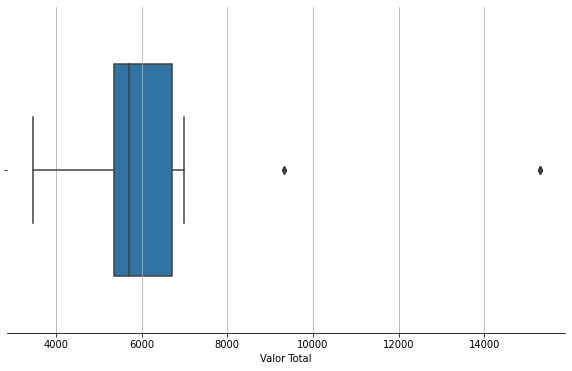

In [ ]:
#Segmentado por quantidade de quartos 3

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x= 'Valor Total', data= df3, width= .65)
ax.xaxis.grid(True)
sns.despine(trim=False, left=True)

In [ ]:
print(f" A média de valores para 3 quartos é: {df3['Valor Total'].mean()}")
print(f" A mediana de valores para 3 quartos é: {df3['Valor Total'].median()}")
print(f" O Valor máximo é: {df3['Valor Total'].max()}")
print(f" O Valor mínimo é: {df3['Valor Total'].min()}\n")

print(f" O total de imóveis com 3 quartos é: {len(df3['Valor Total'])}")

 A média de valores para 3 quartos é: 6731.523809523809
 A mediana de valores para 3 quartos é: 5716.0
 O Valor máximo é: 15300.0
 O Valor mínimo é: 3453.0

 O total de imóveis com 3 quartos é: 63


In [ ]:
print(f" A média de Aluguel para 3 quartos é: {df3['Preco'].mean()}")
print(f" A mediana de Aluguel para 3 quartos é: {df3['Preco'].median()}")
print(f" O Valor máximo é: {df3['Preco'].max()}")
print(f" O Valor mínimo é: {df3['Preco'].min()}\n")

print(f" A média de Condomínio para 3 quartos é: {df3['Condomínio'].mean()}")
print(f" A mediana de Condomínio para 3 quartos é: {df3['Condomínio'].median()}")
print(f" O Valor máximo é: {df3['Condomínio'].max()}")
print(f" O Valor mínimo é: {df3['Condomínio'].min()}\n")

 A média de Aluguel para 3 quartos é: 5398.412698412699
 A mediana de Aluguel para 3 quartos é: 4500.0
 O Valor máximo é: 13000.0
 O Valor mínimo é: 2500.0

 A média de Condomínio para 3 quartos é: 1333.111111111111
 A mediana de Condomínio para 3 quartos é: 1250.0
 O Valor máximo é: 2300.0
 O Valor mínimo é: 600.0

